#pip install h5py

In [1]:
import IPython
import IPython.display
import numpy as np
import pandas as pd
import glob
import joblib  
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import imblearn
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.datasets import make_imbalance
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
import numpy as geek 

In [2]:
df1 = pd.read_hdf('D:\Clases\Tesis\ogle_label_full_360.hdf')
yframes = pd.read_hdf('D:\Clases\Tesis\ogle_output_full_360.hdf')

In [3]:
# yframes = pd.read_hdf('/content/drive/MyDrive/Colab Notebooks/Data/gaia_output_full_diff.hdf')
df2 = pd.read_hdf('D:\Clases\Tesis\ogle_label_full_360diff.hdf')

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
print(df1)

                time     mag
0         2166.83369  19.012
1         2172.88246  19.149
2         2189.84343  18.960
3         2212.78834  19.155
4         2212.79165  19.134
...              ...     ...
39593875  3824.83762  14.649
39593876  3825.85940  14.648
39593877  3826.83731  14.657
39593878  3827.86021  14.647
39593879  3828.83574  14.646

[39593880 rows x 2 columns]


In [6]:
print(df2)

          timediff  magdiff
0          6.04877    0.137
1         16.96097   -0.189
2         22.94491    0.195
3          0.00331   -0.021
4          4.98161   -0.003
...            ...      ...
39593875   1.02178   -0.001
39593876   0.97791    0.009
39593877   1.02290   -0.010
39593878   0.97553   -0.001
39593879   0.97823   -0.007

[39593880 rows x 2 columns]


In [7]:
print(yframes)

        class
0           0
1           1
2           0
3           0
4           1
...       ...
109978      8
109979      8
109980      9
109981      8
109982      9

[109983 rows x 1 columns]


In [8]:
yframes['class'].value_counts()

8     70832
9     10211
0      7077
5      6137
7      3506
1      3111
3      2290
2      2245
6      1849
10     1792
4       933
Name: class, dtype: int64

In [9]:
# df1.columns = ['Time','Mag']
# df2.columns = ['diffTime','diffMag']
# df = pd.concat([df1, df2], axis=1)

In [10]:
df = pd.concat([df1, df2], axis=1)

In [11]:
print(df)

                time     mag  timediff  magdiff
0         2166.83369  19.012   6.04877    0.137
1         2172.88246  19.149  16.96097   -0.189
2         2189.84343  18.960  22.94491    0.195
3         2212.78834  19.155   0.00331   -0.021
4         2212.79165  19.134   4.98161   -0.003
...              ...     ...       ...      ...
39593875  3824.83762  14.649   1.02178   -0.001
39593876  3825.85940  14.648   0.97791    0.009
39593877  3826.83731  14.657   1.02290   -0.010
39593878  3827.86021  14.647   0.97553   -0.001
39593879  3828.83574  14.646   0.97823   -0.007

[39593880 rows x 4 columns]


In [12]:
#df = df.drop(['magdiff'], axis=1)

In [14]:
print(df.shape)

(39593880, 4)


In [15]:
print(yframes.shape)

(109983, 1)


In [16]:
sample_size = 360

In [17]:
df.head(sample_size+1)

,time,mag,timediff,magdiff
0,2166.83369,19.012,6.04877,0.137
1,2172.88246,19.149,16.96097,-0.189
2,2189.84343,18.960,22.94491,0.195
3,2212.78834,19.155,0.00331,-0.021
4,2212.79165,19.134,4.98161,-0.003
...,...,...,...,...
356,3657.78888,19.259,4.00809,0.053
357,3661.79697,19.312,0.00361,-0.123
358,3661.80058,19.189,4.99353,-0.130
359,3666.79411,19.059,0.00362,0.088


In [18]:
#yframes lista de clase de salida
df_array = df.to_numpy()
array_flat = np.reshape(df_array,((int(len(df)/sample_size), sample_size, df.shape[1])))
#df_array.shape

column_indices = {name: i for i, name in enumerate(df.columns)}

#Tomamos el 10% de la data para test (0.1)
X_train_val, test_df, y_train_val, y_test_df = train_test_split(array_flat, yframes, test_size=0.1, random_state=42)
#Tomamos el 10% de la data para validación (0.11)
X_trainp, val_df, y_trainp, y_val_df = train_test_split(X_train_val, y_train_val, test_size=0.11, random_state=42)
#Generar training, 1-test_size = porcentaje
train_df, trash_x, y_train_df, trash_y = train_test_split(X_trainp, y_trainp, test_size=0.0001, random_state=42)

# X_train_val, test_df = train_test_split(array_flat, test_size=0.1, random_state=42)
# train_df, val_df = train_test_split(X_train_val, test_size=0.384, random_state=42)

print('train_df: ',train_df.shape)
print('y_train_df: ',y_train_df.shape)
print('val_df: ',val_df.shape)
print('test_df: ',test_df.shape)
print('trash_x',trash_x.shape)

train_df:  (88086, 360, 4)
y_train_df:  (88086, 1)
val_df:  (10889, 360, 4)
test_df:  (10999, 360, 4)
trash_x (9, 360, 4)


In [19]:
# y_train_df.head(50)

In [20]:
#reshape(train_df.shape[0]*sample_size)
train_df = train_df.reshape(train_df.shape[0]*sample_size , train_df.shape[2])

In [21]:
train_df.shape

(31710960, 4)

In [22]:
print(y_train_df)

        class
842         0
14437       7
36250       8
15364       7
101080      8
...       ...
49466       0
13735       5
108376      8
99009       8
98841       8

[88086 rows x 1 columns]


In [23]:
y_train_df = y_train_df.to_numpy()

In [24]:
repetitions = sample_size
y_train_df = geek.repeat(y_train_df, repetitions) 

In [25]:
len(y_train_df)

31710960

In [26]:
train_df = pd.DataFrame(train_df)
y_train_df = pd.DataFrame(y_train_df)

In [27]:
train_df.columns = ['Time','Mag','Timediff', 'Magdiff']
y_train_df.columns = ['Class']

In [28]:
print(train_df)

                Time     Mag  Timediff  Magdiff
0         2166.81545  16.059   6.04880   -0.015
1         2172.86425  16.044  11.01132    0.011
2         2183.87557  16.055   5.94596   -0.004
3         2189.82153  16.051   2.02919    0.177
4         2191.85072  16.228  20.92109   -0.035
...              ...     ...       ...      ...
31710955  4268.77635  13.213   0.74684   -0.004
31710956  4269.52319  13.209   3.02293   -0.005
31710957  4272.54612  13.204   1.19902   -0.023
31710958  4273.74514  13.181   0.85947    0.010
31710959  4274.60461  13.191   1.03280    0.002

[31710960 rows x 4 columns]


In [48]:
print(y_train_df)

          Class
0             0
1             0
2             0
3             0
4             0
...         ...
31710955      8
31710956      8
31710957      8
31710958      8
31710959      8

[31710960 rows x 1 columns]


8     20463480
9      2940120
0      2017080
5      1767600
7      1009440
1       889200
3       663480
2       637200
6       537840
10      522720
4       262800
Name: Class, dtype: int64

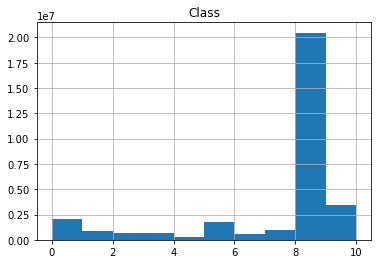

In [49]:
y_train_df.hist('Class')
y_train_df['Class'].value_counts()

In [32]:
labels_ogle_train = pd.concat([train_df, y_train_df], axis=1)

In [33]:
print(labels_ogle_train)

                Time     Mag  Timediff  Magdiff  Class
0         2166.81545  16.059   6.04880   -0.015      0
1         2172.86425  16.044  11.01132    0.011      0
2         2183.87557  16.055   5.94596   -0.004      0
3         2189.82153  16.051   2.02919    0.177      0
4         2191.85072  16.228  20.92109   -0.035      0
...              ...     ...       ...      ...    ...
31710955  4268.77635  13.213   0.74684   -0.004      8
31710956  4269.52319  13.209   3.02293   -0.005      8
31710957  4272.54612  13.204   1.19902   -0.023      8
31710958  4273.74514  13.181   0.85947    0.010      8
31710959  4274.60461  13.191   1.03280    0.002      8

[31710960 rows x 5 columns]


In [34]:
Class8 = labels_ogle_train[labels_ogle_train["Class"] == 8]
Class_rest = labels_ogle_train[labels_ogle_train["Class"] != 8]

In [35]:
print(Class8.shape)
print(Class_rest.shape)

(20463480, 5)
(11247480, 5)


In [42]:
Class8 = Class8.to_numpy()

In [43]:
# 284215 = (20463480*5)/360
Class8 = Class8.reshape(284215,360)

In [44]:
print(Class8)

[[ 2.16789750e+03  1.47350000e+01  2.59222700e+01 ...  1.93481000e+00
  -1.40000000e-02  8.00000000e+00]
 [ 2.65764795e+03  1.47030000e+01  2.15379000e+00 ...  1.10234000e+00
   1.80000000e-02  8.00000000e+00]
 [ 3.04772231e+03  1.47160000e+01  9.31090000e-01 ...  6.05745000e+00
  -2.10000000e-02  8.00000000e+00]
 ...
 [ 3.09773714e+03  1.31920000e+01  1.99548000e+00 ...  5.00999000e+00
   1.00000000e-03  8.00000000e+00]
 [ 3.22350085e+03  1.32010000e+01  1.00122000e+00 ...  3.71984450e+02
   7.00000000e-03  8.00000000e+00]
 [ 4.15183307e+03  1.32080000e+01  3.00965000e+00 ...  1.03280000e+00
   2.00000000e-03  8.00000000e+00]]


In [46]:
#Class8 = pd.DataFrame(Class8)

In [50]:
from sklearn.utils import resample
Class8_downsample = resample(Class8,
             replace=True,
             n_samples=56843,
             random_state=42)

print(Class8_downsample)

               0       1         2      3    4           5       6        7    \
121958  3468.79160  14.961   0.07384 -0.010  8.0  3468.86544  14.951  0.04957   
146867  3138.72475  13.932   1.97175 -0.012  8.0  3140.69650  13.920  0.23380   
131932  2645.75626  15.392   0.02061 -0.013  8.0  2645.77687  15.379  0.08579   
259178  3135.89906  14.690   2.03902 -0.003  8.0  3137.93808  14.687  0.76269   
119879  3541.82998  15.061   4.90475  0.024  8.0  3546.73473  15.085  0.10052   
...            ...     ...       ...    ...  ...         ...     ...      ...   
233689  3554.62877  13.724   1.98380 -0.004  8.0  3556.61257  13.720  2.06316   
37168   1698.81151  13.411   1.78314  0.001  8.0  1700.59465  13.412  3.01485   
192171   608.85765  13.392   5.74827 -0.003  8.0   614.60592  13.389  0.18926   
250517   998.61935  14.299   7.11289 -0.012  8.0  1005.73224  14.287  1.93688   
163435   531.85339  13.660  11.00720 -0.002  8.0   542.86059  13.658  8.03771   

          8    9    ...    

In [51]:
Class8_downsample.shape

(56843, 360)

In [53]:
Class8_downsample = Class8_downsample.to_numpy()

In [54]:
Class8_downsample = Class8_downsample.reshape(4092696,5)

In [55]:
Class8_downsample = pd.DataFrame(Class8_downsample)

In [59]:
Class8_downsample.columns = ['Time','Mag','Timediff', 'Magdiff', 'Class']

In [60]:
print(Class8_downsample)

               Time     Mag  Timediff  Magdiff  Class
0        3468.79160  14.961   0.07384   -0.010    8.0
1        3468.86544  14.951   0.04957   -0.011    8.0
2        3468.91501  14.940   0.87396    0.019    8.0
3        3469.78897  14.959   1.01291    0.019    8.0
4        3470.80188  14.978   1.12641    0.002    8.0
...             ...     ...       ...      ...    ...
4092691   700.57625  13.661   3.97909   -0.011    8.0
4092692   704.55534  13.650   3.99657    0.021    8.0
4092693   708.55191  13.671   5.05653    0.024    8.0
4092694   713.60844  13.695   6.94525   -0.006    8.0
4092695   720.55369  13.689  12.02499   -0.024    8.0

[4092696 rows x 5 columns]


In [88]:
labels_ogle_train = pd.concat([Class_rest, Class8_downsample])

In [89]:
print(labels_ogle_train)

               Time     Mag  Timediff  Magdiff  Class
0        2166.81545  16.059   6.04880   -0.015    0.0
1        2172.86425  16.044  11.01132    0.011    0.0
2        2183.87557  16.055   5.94596   -0.004    0.0
3        2189.82153  16.051   2.02919    0.177    0.0
4        2191.85072  16.228  20.92109   -0.035    0.0
...             ...     ...       ...      ...    ...
4092691   700.57625  13.661   3.97909   -0.011    8.0
4092692   704.55534  13.650   3.99657    0.021    8.0
4092693   708.55191  13.671   5.05653    0.024    8.0
4092694   713.60844  13.695   6.94525   -0.006    8.0
4092695   720.55369  13.689  12.02499   -0.024    8.0

[15340176 rows x 5 columns]


In [90]:
#FLAT DF TO SHUFFLE
#labels_ogle_train.shape
#pasar a numpy
labels_ogle_train = labels_ogle_train.to_numpy()
#reshape (15340176*5)/360 = 213058 | (213058,360)
labels_ogle_train = labels_ogle_train.reshape(213058,360)
#shuffle
np.random.shuffle(labels_ogle_train)
#volver reshape
labels_ogle_train = labels_ogle_train.reshape(15340176, 5)
#pasar a pandas
labels_ogle_train = pd.DataFrame(labels_ogle_train)
labels_ogle_train.columns = ['Time','Mag','Timediff', 'Magdiff', 'Class']

In [78]:
print(labels_ogle_train)

                Time     Mag  Timediff  Magdiff  Class
0         2906.75290  14.448   1.97703    0.008    9.0
1         2908.72993  14.456   1.99490    0.001    9.0
2         2910.72483  14.457   2.00591   -0.002    9.0
3         2912.73074  14.455   4.01266    0.008    9.0
4         2916.74340  14.463   1.97704    0.000    9.0
...              ...     ...       ...      ...    ...
15340171  2191.68606  16.423   0.96310    0.496    3.0
15340172  2192.64916  16.919   0.01751    0.039    3.0
15340173  2192.66667  16.958   1.00360   -0.246    3.0
15340174  2193.67027  16.712   0.01746    0.015    3.0
15340175  2193.68773  16.727   0.95069    0.267    3.0

[15340176 rows x 5 columns]


Class=0, n=2017080 (17.934%)
Class=7, n=1009440 (8.975%)
Class=1, n=889200 (7.906%)
Class=8, n=2940120 (26.140%)
Class=4, n=262800 (2.337%)
Class=9, n=522720 (4.647%)
Class=3, n=663480 (5.899%)
Class=5, n=1767600 (15.716%)
Class=2, n=637200 (5.665%)
Class=6, n=537840 (4.782%)


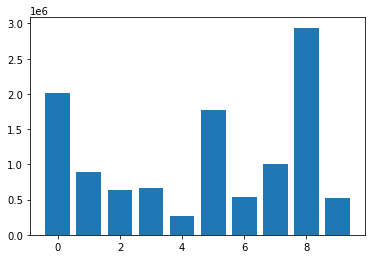

In [91]:
data = Class_rest.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=0, n=2017080 (10.360%)
Class=7, n=2018880 (10.369%)
Class=1, n=1778400 (9.134%)
Class=8, n=2940120 (15.101%)
Class=4, n=788400 (4.049%)
Class=9, n=1568160 (8.054%)
Class=3, n=1990440 (10.223%)
Class=5, n=1767600 (9.079%)
Class=2, n=1911600 (9.818%)
Class=6, n=2689200 (13.812%)


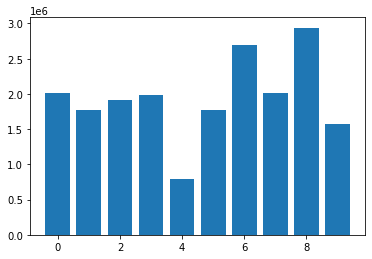

In [93]:
#Ajustamos todas las clases a un minimo de 8000 salidas. Es decir minimo 2.880.000 entradas por clase
data = Class_rest.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
strategy = {0:2017080*1, 
            1:889200*2, 
            2:637200*3, 
            3:663480*3, 
            4:262800*3, 
            5:1767600*1, 
            6:537840*5, 
            7:1009440*2, 
            8:2940120*1, 
            9:522720*3}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [94]:
print(data)

[[ 2.16681545e+03  1.60590000e+01  6.04880000e+00 -1.50000000e-02
   0.00000000e+00]
 [ 2.17286425e+03  1.60440000e+01  1.10113200e+01  1.10000000e-02
   0.00000000e+00]
 [ 2.18387557e+03  1.60550000e+01  5.94596000e+00 -4.00000000e-03
   0.00000000e+00]
 ...
 [ 2.67378420e+03  1.96160000e+01  2.98030000e+00 -3.45000000e-01
   5.00000000e+00]
 [ 2.67676450e+03  1.92710000e+01  2.04593000e+00  6.90000000e-02
   5.00000000e+00]
 [ 2.67881043e+03  1.93400000e+01  1.89220000e+00  2.19000000e-01
   5.00000000e+00]]


In [95]:
print(X, y)

[[ 2.16681545e+03  1.60590000e+01  6.04880000e+00 -1.50000000e-02]
 [ 2.17286425e+03  1.60440000e+01  1.10113200e+01  1.10000000e-02]
 [ 2.18387557e+03  1.60550000e+01  5.94596000e+00 -4.00000000e-03]
 ...
 [ 3.12485646e+03  1.91530007e+01  1.83039416e+00  2.93052026e-01]
 [ 2.46664535e+03  1.62831223e+01  2.02816314e+00 -2.74020316e-02]
 [ 3.13870466e+03  1.36225641e+01  1.17727386e+00  1.42971210e-02]] [0 0 0 ... 9 9 9]


In [96]:
print(y)

[0 0 0 ... 9 9 9]


In [97]:
train_df = X
y_train_df = y

In [98]:
print(train_df.shape)
print(y_train_df.shape)
print(val_df.shape)
print(test_df.shape)

(19469880, 4)
(19469880,)
(10889, 360, 4)
(10999, 360, 4)


In [99]:
train_df = np.asarray(train_df).reshape(int(train_df.shape[0]/sample_size),sample_size,train_df.shape[1])

In [100]:
y_train_df = pd.DataFrame(y_train_df)
y_val_df = pd.DataFrame(y_val_df)
y_test_df = pd.DataFrame(y_test_df)

In [101]:
train_df.shape

(54083, 360, 4)

In [102]:
y_train_df.shape

(19469880, 1)

In [103]:
print('train_df: ',train_df.shape)
print('y_train_df: ',y_train_df.shape)
print('val_df: ',val_df.shape)
print('y_val_df: ',y_val_df.shape)

train_df:  (54083, 360, 4)
y_train_df:  (19469880, 1)
val_df:  (10889, 360, 4)
y_val_df:  (10889, 1)


In [104]:
y_train_df = y_train_df[y_train_df.index % sample_size == 0]

In [105]:
print('train_df: ',train_df.shape)
print('y_train_df: ',y_train_df.shape)
print('val_df: ',val_df.shape)
print('y_val_df: ',y_val_df.shape)

train_df:  (54083, 360, 4)
y_train_df:  (54083, 1)
val_df:  (10889, 360, 4)
y_val_df:  (10889, 1)


In [106]:
print(y_train_df)

          0
0         0
360       7
720       7
1080      1
1440      8
...      ..
19468080  9
19468440  9
19468800  9
19469160  9
19469520  9

[54083 rows x 1 columns]


In [107]:
#Normalización de siempre

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [108]:
MAX_EPOCHS = 500
checkpoint_filepath = "OGLE"

def compile_and_fit(model, x, y, x_val,y_val, patience=10):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
#   print(x.shape)
#   print(y.shape)

  # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error',
  #                                                   patience=patience,
  #                                                   mode='min')
  
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

  model.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=['accuracy'])
  #print(model.summary())
  history = model.fit(x, y, epochs=MAX_EPOCHS,
                      validation_data=(x_val, y_val),
                      callbacks=[early_stopping, model_checkpoint_callback])
  return history

In [109]:
lstm_model = tf.keras.models.Sequential([

    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(128, return_sequences=True),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(64, return_sequences=True),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(units=11 , activation = 'softmax')
])

# Sección nueva

In [110]:
history = compile_and_fit(lstm_model, train_df, y_train_df, val_df, y_val_df)
val_performance = {}
performance = {}
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(val_df, y_val_df)
performance['LSTM'] = lstm_model.evaluate(test_df, y_test_df, verbose=1)

Epoch 1/500
1112/1691 [==================>...........] - ETA: 2:40 - loss: 1.7322 - accuracy: 0.3782

KeyboardInterrupt: 

In [ ]:
lstm_model.save("lstm_model_diff_ogle.h5") 